# "Метанпромбанк" — Анализ оттока клиентов

# Материалы <a class="anchor" id="0"></a>
* [Презентация](https://disk.yandex.ru/i/hNWdKWPzfmKMzg)
* [Дашборд](https://public.tableau.com/views/BanksProjectYandex/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

**Заказчик:** отдел маркетинга <br/>

**Задача:** максимально эффективно выделить сегменты отточных клиентов, чтобы они были однородными, высокоотточными и покрывали максимум проблемных зон банка

# Описание датасета

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

# Декомпозиция задачи

1. [Загрузка данных и ознакомление с ними](#1)
2. [Предобработка данных](#2)
    1. [Проверка названий столбцов](#2.1)
    2. [Проверка на пропуски](#2.2)
    3. [Проверка на дубликаты](#2.3)
    4. [One-hot кодирование неупорядоченных категориальных данных](#2.4)
3. [Исследовательский анализ данных](#3)
    1. [Графики распределения](#3.1)
    2. [Составление портретов клиентов](#3.2)
    3. [Корреляционный анализ](#3.3)
4. [Проверка статистических гипотез](#4)
    1. [Гипотеза 1: "Есть различия в доходе отточных клиентов и текущих"](#4.1)
    2. [Гипотеза 2: "Есть различия в возрасте отточных клиентов и текущих"](#4.2)
5. [Промежуточный вывод о том, какие показатели стратегически влияют на отток](#5)
6. [Сегментация на основе стратегических показателей](#6)
    1. [Приоритезация сегментов](#6.1)
7. [Выводы и рекомендации по конкретным сегментам для заказчика](#7)
8. [Общий вывод](#8)
9. [Подготовка презентации](#0)
10. [Составление дашборда](#0)

## Загрузка данных и ознакомление с ними <a class="anchor" id="1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import plotly.graph_objects as go
import plotly.express as px

In [2]:
try:
    data = pd.read_csv('/datasets/bank_dataset.csv')
except:
    data = pd.read_csv('https://yadi.sk/d/JVAJ9uxtV1uydQ')

In [3]:
data.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


## Предобработка данных <a class="anchor" id="2"></a>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Проверка названий столбцов <a class="anchor" id="2.1"></a>

In [5]:
data.columns = map(str.lower, data.columns)
data = data.rename(columns={'userid': 'user_id', 'creditcard':'credit_card'})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Проверка на пропуски <a class="anchor" id="2.2"></a>

In [7]:
data.isna().sum()

user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

В датасете 10000 записей. 3617 пропусков в столбце `Balance`. Скорее всего, пропуск означает, что у клиента на счете нет денег. Значит, заменим пропуски на `0`.

In [8]:
data_null = data.query('balance.isna()')
data_null

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15648358,841,Рыбинск,М,28,4,NaN,2,1,1,179436.60,0
9992,15699841,726,Рыбинск,М,36,2,NaN,1,1,0,195192.40,0
9994,15762030,800,Ярославль,Ж,29,2,NaN,2,0,0,167773.55,0
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0


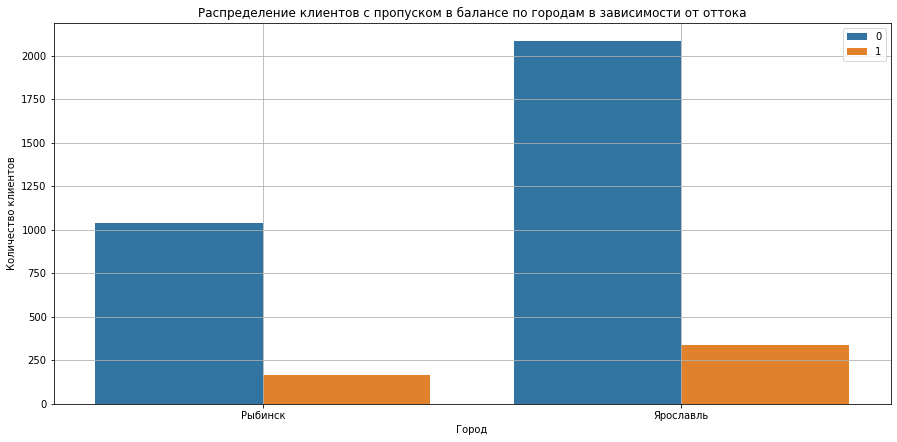

In [9]:
plt.figure(figsize=(15, 7))
sns.barplot(x='city', 
            y='user_id', 
            data=data_null.groupby(['city', 'churn'], as_index=False)[['user_id']].count(), 
            hue='churn')
plt.title('Распределение клиентов с пропуском в балансе по городам в зависимости от оттока')
plt.xlabel('Город')
plt.ylabel('Количество клиентов')
plt.legend(loc='upper right', fontsize=10)
plt.grid()
plt.show()

Можно заметить, что нет клиентов с пропуском в балансе в городе Ростов Великий. Возможно, в этом городе не предоставляются услуги, как в остальных городах, подразумевающие возможность не пополнять баланс.

In [10]:
data['balance'] = data['balance'].fillna(0)

In [11]:
data.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,0.00,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


### Проверка на дубликаты <a class="anchor" id="2.3"></a>

In [12]:
data.duplicated().sum()

0

Дубликатов нет. Можно приступать к перекодированию неупорядоченных категориальных данных.

### One-hot кодирование столбцов <a class="anchor" id="2.4"></a>

In [13]:
data['gender'].unique()

array(['Ж', 'М'], dtype=object)

In [14]:
data_onehot = pd.get_dummies(data[['city', 'gender']], dtype=int)

In [15]:
data_onehot.head()

,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,0,0,1,1,0
1,0,1,0,1,0
2,0,0,1,1,0
3,0,0,1,1,0
4,0,1,0,1,0


In [16]:
data = data.merge(data_onehot, left_index=True, right_index=True)

In [17]:
data.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,101348.88,1,0,0,1,1,0
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,0,0,1,1,0
3,15744090,699,Ярославль,Ж,39,1,0.00,2,0,0,93826.63,0,0,0,1,1,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1,0


## Исследовательский анализ данных <a class="anchor" id="3"></a>

### Графики распределения <a class="anchor" id="3.1"></a>

In [18]:
#функция для визуализации количественных распределений
def draw_hist (param,title,xlable):
    plt.figure(figsize=(15, 7))
    sns.histplot(x=param, 
                 data=data, 
                 kde=True, 
                 hue='churn',
                 stat='density',
                 common_norm=False)
    plt.title(title)
    plt.xlabel(xlable)
    plt.ylabel('Количество клиентов')
    plt.show()

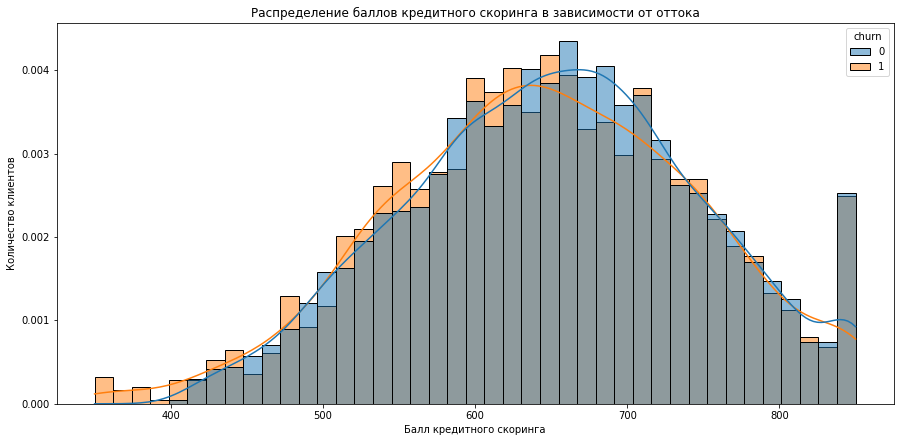

In [19]:
draw_hist('score', 
          'Распределение баллов кредитного скоринга в зависимости от оттока', 
          'Балл кредитного скоринга')

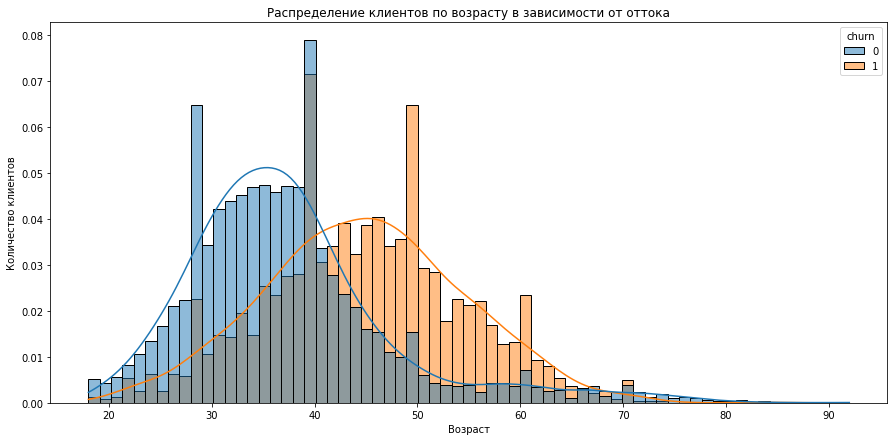

In [20]:
draw_hist('age',
          'Распределение клиентов по возрасту в зависимости от оттока',
          'Возраст')

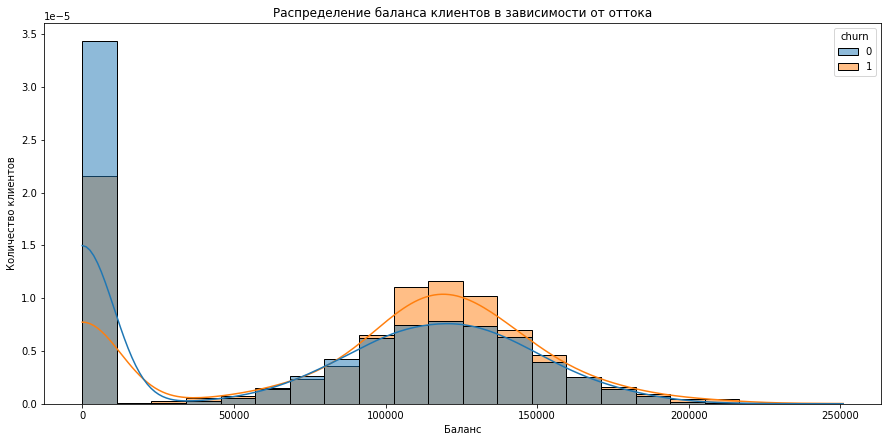

In [21]:
draw_hist('balance',
          'Распределение баланса клиентов в зависимости от оттока',
          'Баланс')

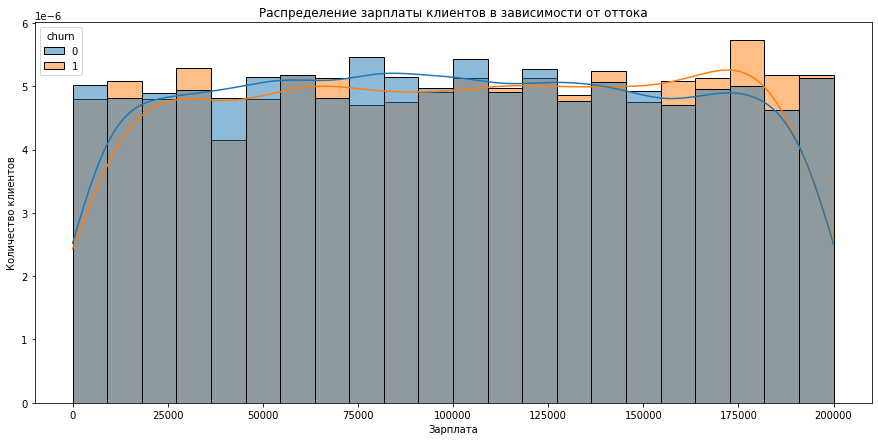

In [22]:
draw_hist('estimated_salary',
          'Распределение зарплаты клиентов в зависимости от оттока',
          'Зарплата')

In [23]:
#функция для визуализации категориальных распределений
def draw_bar (param,title,xlable):
    plt.figure(figsize=(15, 7))
    sns.barplot(x=param, 
                y='user_id', 
                data=data.groupby([param, 'churn'], as_index=False)[['user_id']].count(), 
                hue='churn')
    plt.title(title)
    plt.xlabel(xlable)
    plt.ylabel('Количество клиентов')
    plt.legend(loc='upper right', fontsize=10)
    plt.grid()
    plt.show()

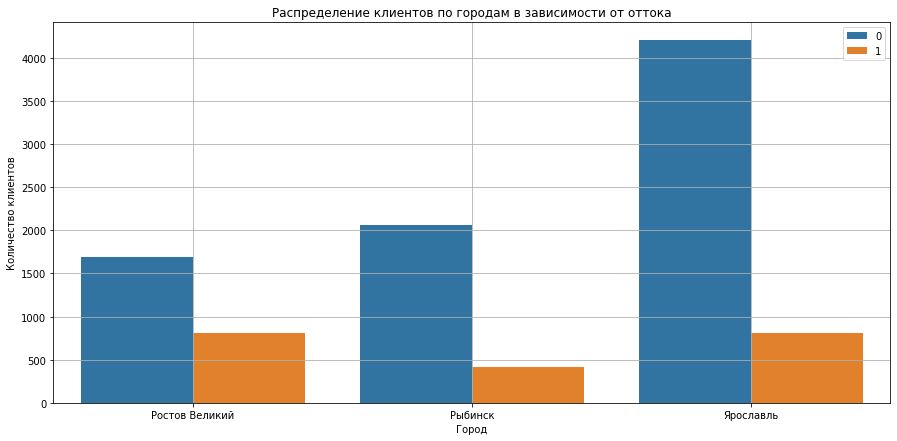

In [24]:
draw_bar('city',
         'Распределение клиентов по городам в зависимости от оттока',
         'Город')

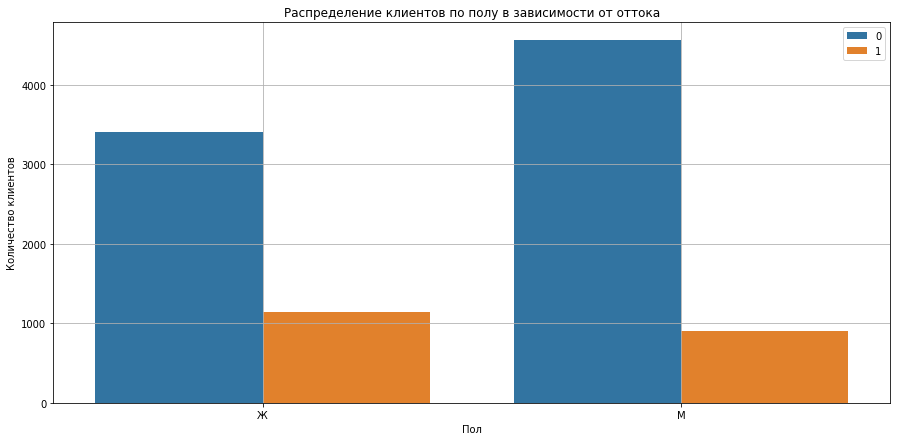

In [25]:
draw_bar('gender',
         'Распределение клиентов по полу в зависимости от оттока',
         'Пол')

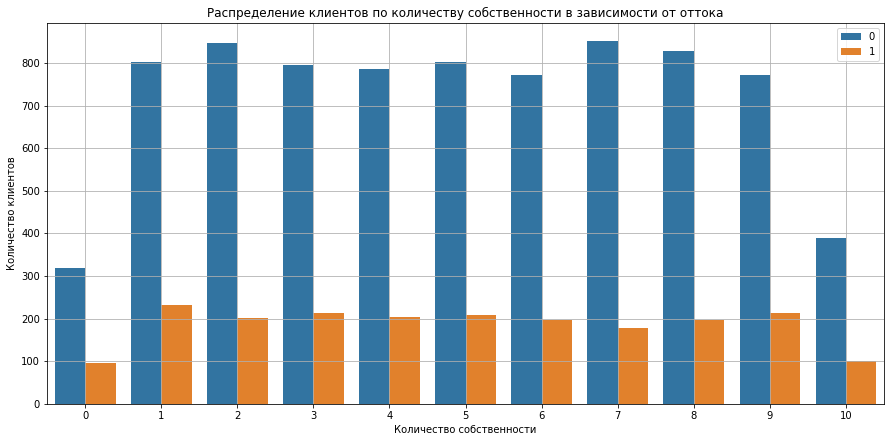

In [26]:
draw_bar('objects',
         'Распределение клиентов по количеству собственности в зависимости от оттока',
         'Количество собственности')

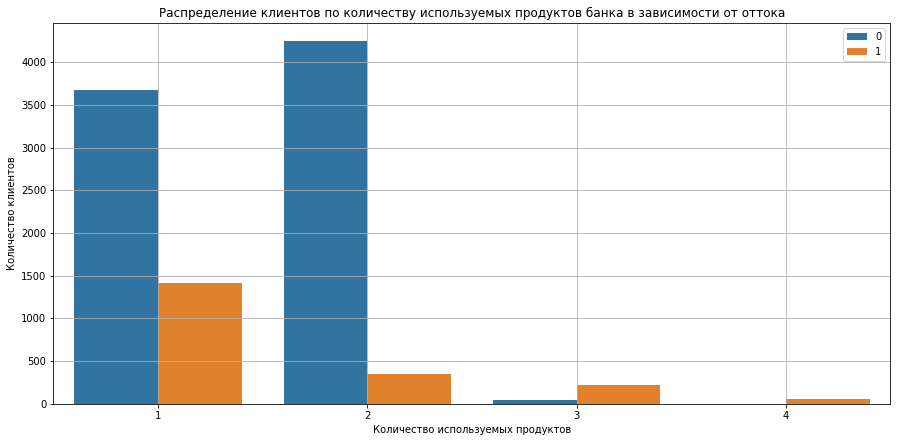

In [27]:
draw_bar('products', 
         'Распределение клиентов по количеству используемых продуктов банка в зависимости от оттока',
         'Количество используемых продуктов')

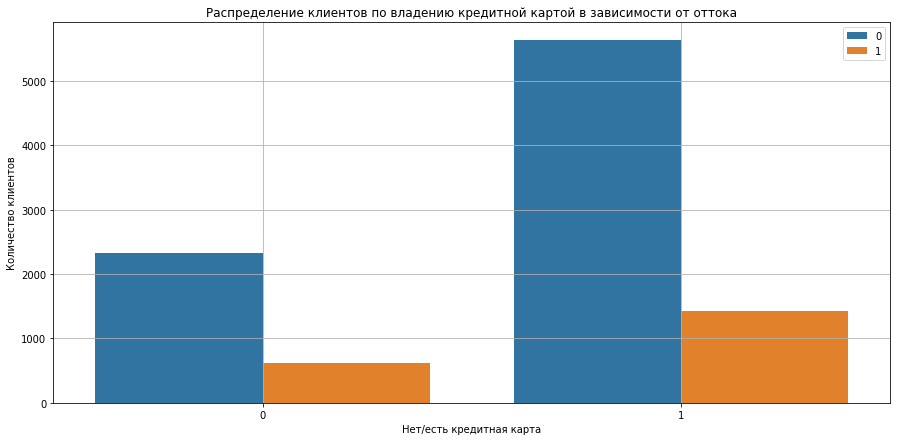

In [28]:
draw_bar('credit_card',
         'Распределение клиентов по владению кредитной картой в зависимости от оттока',
         'Нет/есть кредитная карта')

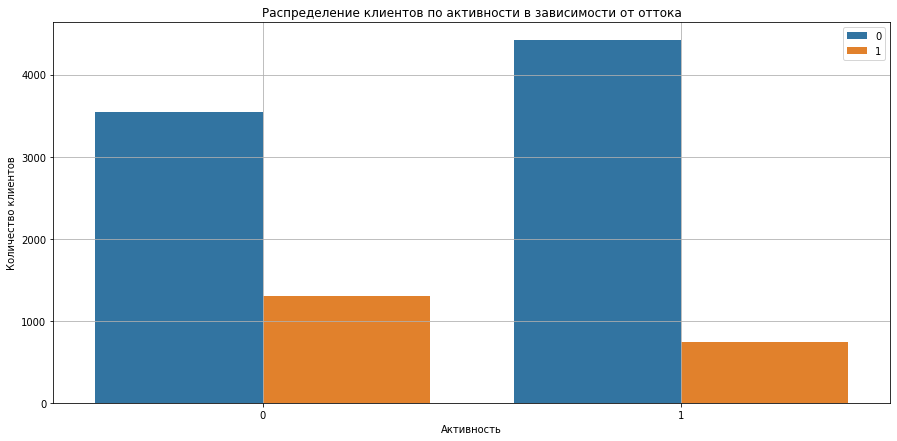

In [29]:
draw_bar('loyalty',
         'Распределение клиентов по активности в зависимости от оттока',
         'Активность')

### Составление портретов клиентов <a class="anchor" id="3.2"></a>

Для категоризации признаков посчитаем средний уровень оттока по всему датасету.

In [30]:
total_avg_churn = data['churn'].astype(int).sum()/data['churn'].count()
total_avg_churn

0.2037

Общий средний уровень оттока клиентов равен ~20%.

Признак `Score` делаится на 4 категории:
- 300-500 - Нет шансов получить заем
- 600-650 - Низкий балл, крупные финансовые организации не рассматривают
- 650-690 - Хороший балл, есть шансы на одобрение займа со стандартными условиями
- 690-850 - Отличный балл, одобрить заем могут с более выгодными условиями

In [31]:
#функция для визуализации количественных распределений с учетом общего среднего уровня оттока
def draw_hist_axhline (param,title,xlable):
    plt.figure(figsize=(15, 7))
    sns.histplot(x=param, 
                 data=data, 
                 kde=True, 
                 hue='churn',
                 stat='density',
                 common_norm=False)
    plt.axhline(y=0.02, color='red')
    plt.title(title)
    plt.xlabel(xlable)
    plt.ylabel('Количество клиентов')
    plt.show()

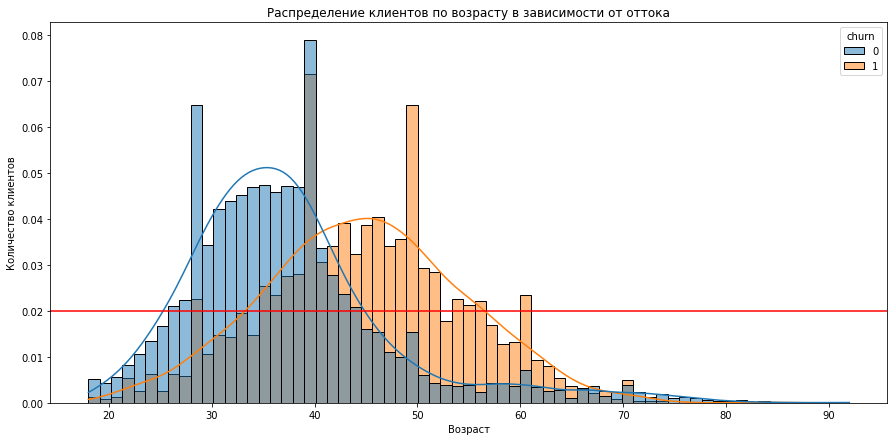

In [32]:
draw_hist_axhline('age',
                 'Распределение клиентов по возрасту в зависимости от оттока',
                 'Возраст')

Категории возраста клиентов можно разделить на 3:
- до 35
- 35-60
- старше 60

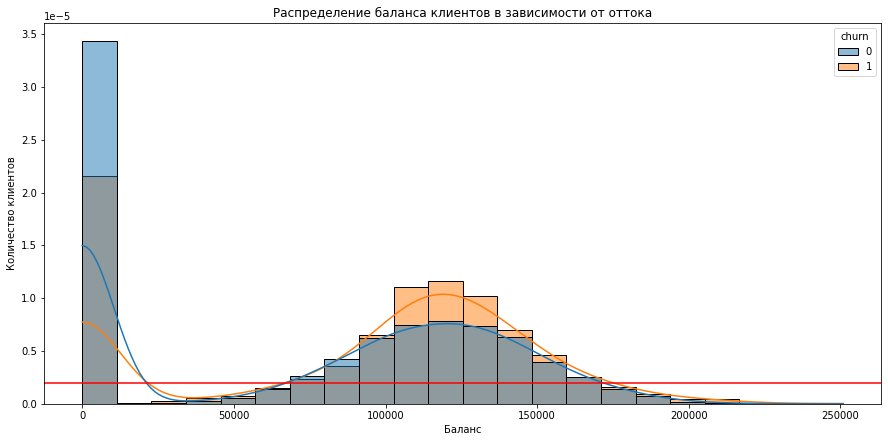

In [33]:
plt.figure(figsize=(15, 7))
sns.histplot(x='balance', 
             data=data, 
             kde=True, 
             hue='churn',
             stat='density',
             common_norm=False)
plt.axhline(y=0.000002, color='red')
plt.title('Распределение баланса клиентов в зависимости от оттока')
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов')
plt.show()

Баланс разделим на следующие категории:
- менее 75000
- 75000-175000
- более 175000

In [34]:
city_grouped = data.groupby('city', as_index=False).agg({'churn':['sum','count']})
city_grouped.columns = ['city', 'sum', 'count']

In [35]:
city_grouped['churn_rate'] = city_grouped['sum']/city_grouped['count']

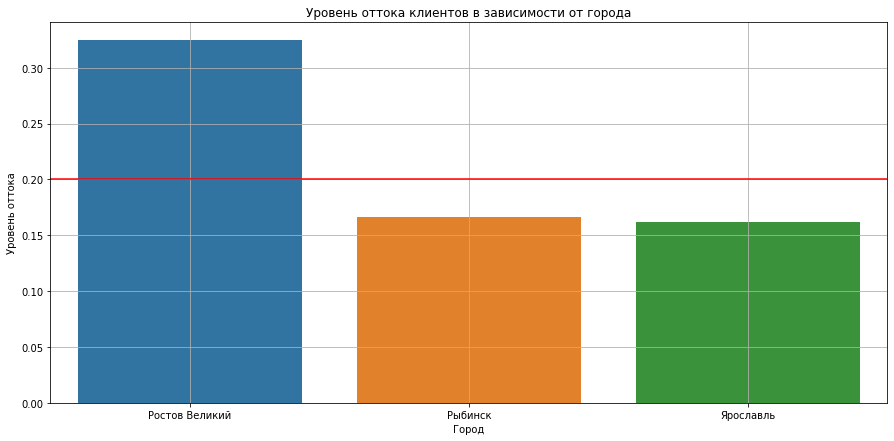

In [36]:
plt.figure(figsize=(15, 7))
sns.barplot(x='city', 
            y='churn_rate', 
            data=city_grouped)
plt.axhline(y=0.2, color='red')
plt.title('Уровень оттока клиентов в зависимости от города')
plt.xlabel('Город')
plt.ylabel('Уровень оттока')
plt.grid()
plt.show()

Самый отточный город - Ростов Великий.

In [37]:
gender_grouped = data.groupby('gender', as_index=False).agg({'churn':['sum','count']})
gender_grouped.columns = ['gender', 'sum', 'count']
gender_grouped['churn_rate'] = gender_grouped['sum']/gender_grouped['count']

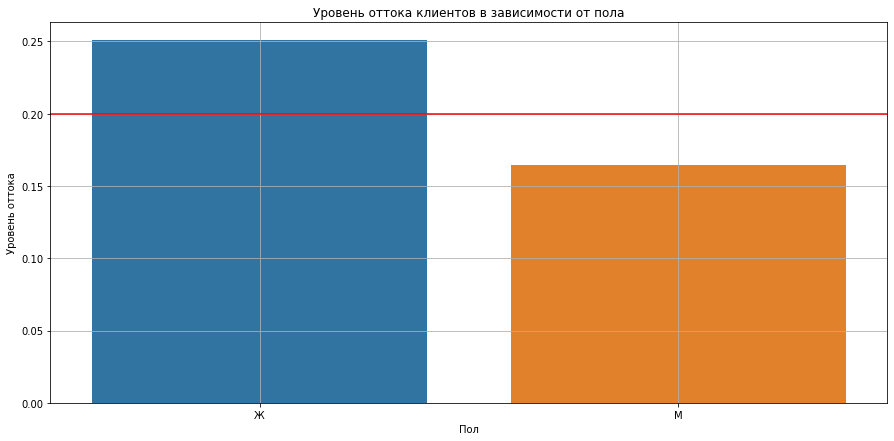

In [38]:
plt.figure(figsize=(15, 7))
sns.barplot(x='gender', 
            y='churn_rate', 
            data=gender_grouped)
plt.axhline(y=0.2, color='red')
plt.title('Уровень оттока клиентов в зависимости от пола')
plt.xlabel('Пол')
plt.ylabel('Уровень оттока')
plt.grid()
plt.show()

Мужчинам более свойственно уходить.

In [39]:
obj_grouped = data.groupby('objects', as_index=False).agg({'churn':['sum','count']})
obj_grouped.columns = ['objects', 'sum', 'count']
obj_grouped['churn_rate'] = obj_grouped['sum']/obj_grouped['count']
obj_grouped

,objects,sum,count,churn_rate
0,0,95,413,0.230024
1,1,232,1035,0.224155
2,2,201,1048,0.191794
3,3,213,1009,0.211100
4,4,203,989,0.205258
5,5,209,1012,0.206522
6,6,196,967,0.202689
7,7,177,1028,0.172179
8,8,197,1025,0.192195
9,9,213,984,0.216463


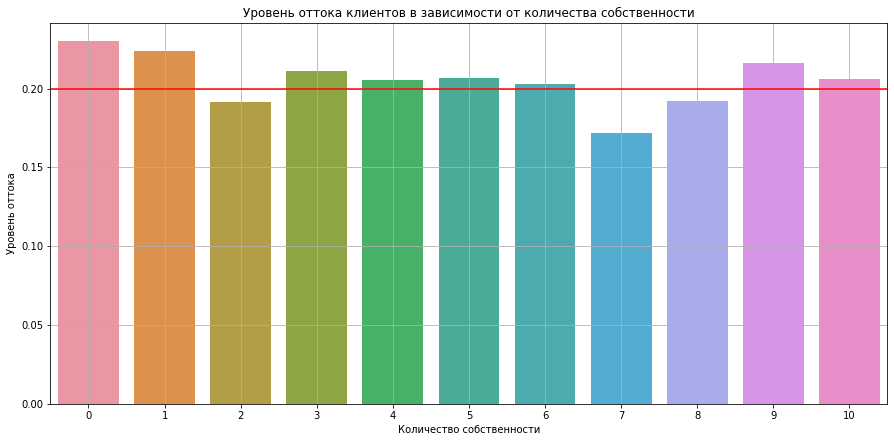

In [40]:
plt.figure(figsize=(15, 7))
sns.barplot(x='objects', 
            y='churn_rate', 
            data=obj_grouped)
plt.axhline(y=0.2, color='red')
plt.title('Уровень оттока клиентов в зависимости от количества собственности')
plt.xlabel('Количество собственности')
plt.ylabel('Уровень оттока')
plt.grid()
plt.show()

In [41]:
prod_grouped = data.groupby('products', as_index=False).agg({'churn':['sum','count']})
prod_grouped.columns = ['products', 'sum', 'count']
prod_grouped['churn_rate'] = prod_grouped['sum']/prod_grouped['count']
prod_grouped

,products,sum,count,churn_rate
0,1,1409,5084,0.277144
1,2,348,4590,0.075817
2,3,220,266,0.827068
3,4,60,60,1.000000


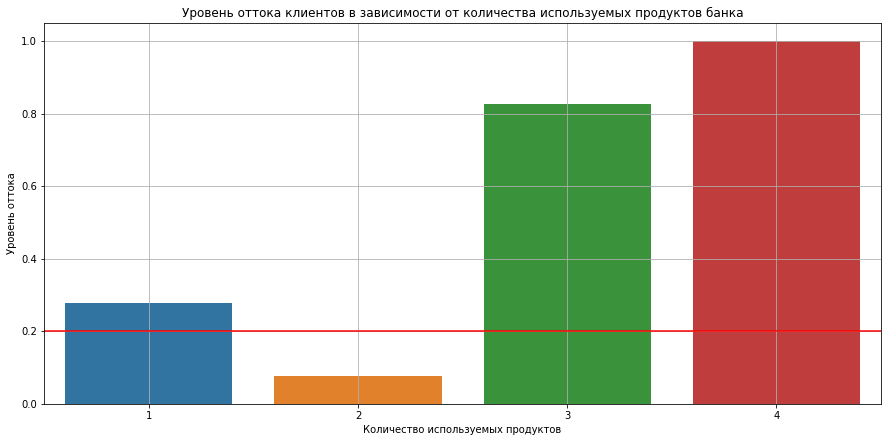

In [42]:
plt.figure(figsize=(15, 7))
sns.barplot(x='products', 
            y='churn_rate', 
            data=prod_grouped)
plt.axhline(y=0.2, color='red')
plt.title('Уровень оттока клиентов в зависимости от количества используемых продуктов банка')
plt.xlabel('Количество используемых продуктов')
plt.ylabel('Уровень оттока')
plt.grid()
plt.show()

In [43]:
cred_grouped = data.groupby('credit_card', as_index=False).agg({'churn':['sum','count']})
cred_grouped.columns = ['credit_card', 'sum', 'count']
cred_grouped['churn_rate'] = cred_grouped['sum']/cred_grouped['count']
cred_grouped

,credit_card,sum,count,churn_rate
0,0,613,2945,0.208149
1,1,1424,7055,0.201843


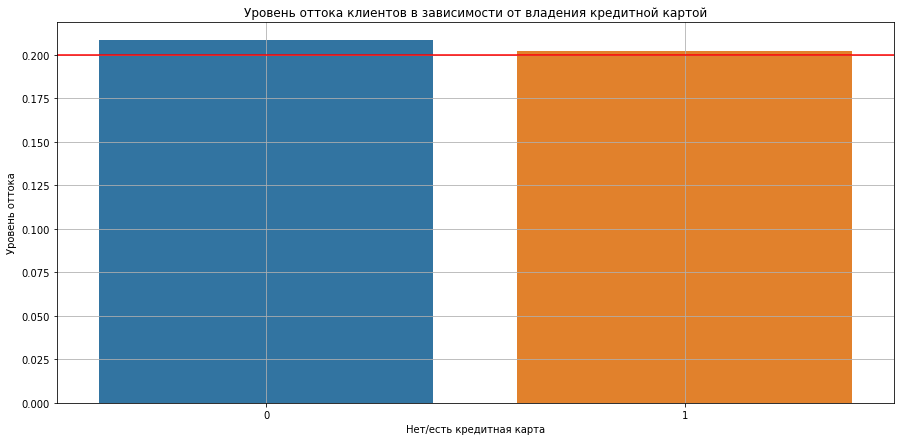

In [44]:
plt.figure(figsize=(15, 7))
sns.barplot(x='credit_card', 
            y='churn_rate', 
            data=cred_grouped)
plt.axhline(y=0.2, color='red')
plt.title('Уровень оттока клиентов в зависимости от владения кредитной картой')
plt.xlabel('Нет/есть кредитная карта')
plt.ylabel('Уровень оттока')
plt.grid()
plt.show()

In [45]:
loyal_grouped = data.groupby('loyalty', as_index=False).agg({'churn':['sum','count']})
loyal_grouped.columns = ['loyalty', 'sum', 'count']
loyal_grouped['churn_rate'] = loyal_grouped['sum']/loyal_grouped['count']
loyal_grouped

,loyalty,sum,count,churn_rate
0,0,1302,4849,0.268509
1,1,735,5151,0.142691


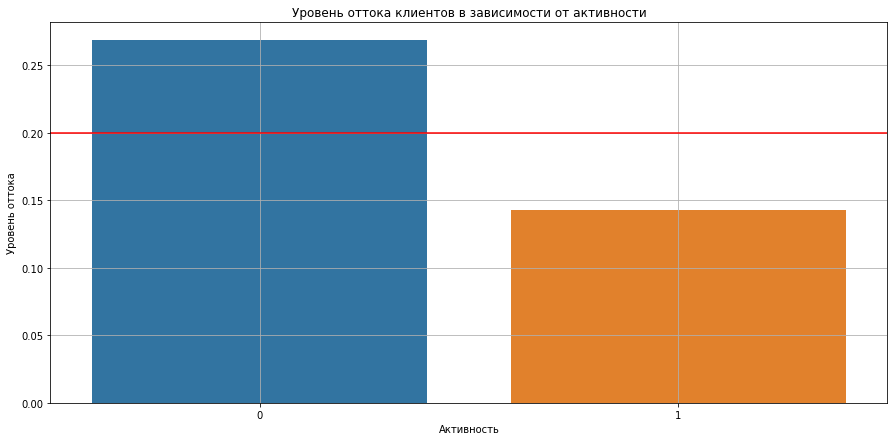

In [46]:
plt.figure(figsize=(15, 7))
sns.barplot(x='loyalty', 
            y='churn_rate', 
            data=loyal_grouped)
plt.axhline(y=0.2, color='red')
plt.title('Уровень оттока клиентов в зависимости от активности')
plt.xlabel('Активность')
plt.ylabel('Уровень оттока')
plt.grid()
plt.show()

### Корреляционный анализ <a class="anchor" id="3.3"></a>

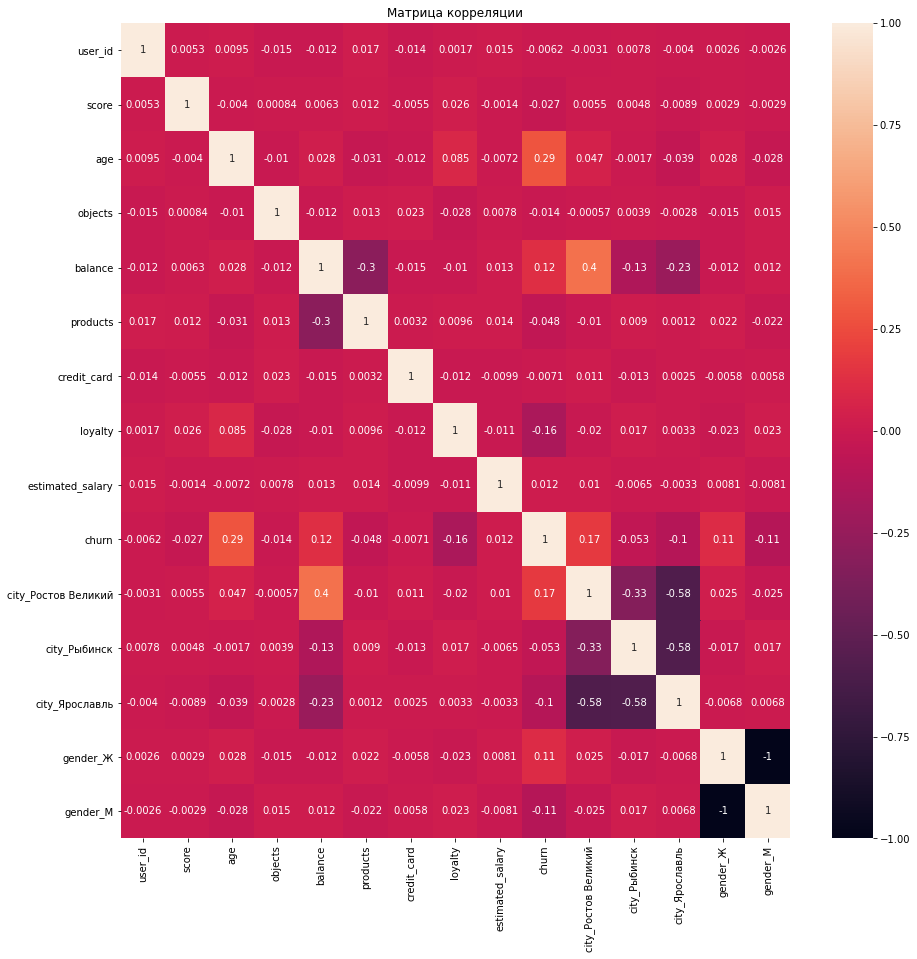

In [47]:
plt.figure(figsize=(15, 15))
fig = sns.heatmap(data.corr(), annot = True)
fig.set(title = 'Матрица корреляции')
#for t in fig.texts:
    #if float(t.get_text())>=0.3 or float(t.get_text())<=-0.3:
        #t.set_text(t.get_text()) 
    #else:
        #t.set_text('')
plt.show()

Более менее значимая корреляция между оттоком и возрастом, а также проживанием в Ростове Великом и балансом.

## Проверка гипотез <a class="anchor" id="4"></a>

### Гипотеза №1. <a class="anchor" id="4.1"></a>
* H0: Доход отточных клиентов равен доходу текущих.
* H1: Доходы отточных и текущих клиентов не равны.

alpha = 0.05

In [48]:
results = st.ttest_ind(
    data[data['churn'] == 1]['estimated_salary'],
    data[data['churn'] == 0]['estimated_salary'],
    equal_var=False)

alpha = .05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.22892461305145798
Не получилось отвергнуть нулевую гипотезу


Не отвергаем нулевую гипотезу: разницы между доходом отточных и текущих клиентов нет.

### Гипотеза №2. <a class="anchor" id="4.2"></a>
* H0: Возраст отточных клиентов равен возрасту текущих.
* H1: Возраст отточных и текущих клиентов не равны.

alpha = 0.05

In [49]:
results = st.ttest_ind(
    data[data['churn'] == 1]['age'],
    data[data['churn'] == 0]['age'],
    equal_var=False)

alpha = .05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

4.7127272656641046e-179
Отвергаем нулевую гипотезу


P-value сильно меньше alpha, отвергаем нулевую гипотезу и считаем, что возраст отточных и текущих клиентов различается.

## Промежуточный вывод о том, какие показатели стратегически влияют на отток <a class="anchor" id="5"></a>

На отток стратегически влияют следующие показатели:
- балл кредитного скоринга
- возраст

## Сегментация на основе стратегических сегментов <a class="anchor" id="6"></a>

Таким образом, можно выделить следующие сегменты отточных клиентов:
* Сегмент 1: кол-во 743
  - мужчины
  - 35-60 лет
  - проживающие в Ростове Великом
  - с балансом 75000-175000
  
* Сегмент 2: кол-во 625
  - мужчины
  - проживающие в Ростове Великом
  - с хорошим и отличным кредитным скорингом 650-850

In [50]:
segment1 = data.query('gender == "М" & age >= 35 & age <= 60 & city == "Ростов Великий" & balance >= 75000 & balance <= 175000')
segment1.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
15,15686702,616,Ростов Великий,М,45,3,143129.41,2,0,1,64327.26,0,1,0,0,0,1
16,15780188,653,Ростов Великий,М,58,1,132602.88,1,1,0,5097.67,1,1,0,0,0,1
26,15779552,756,Ростов Великий,М,36,2,136815.64,1,1,1,170041.95,0,1,0,0,0,1
32,15792917,553,Ростов Великий,М,41,9,110112.54,2,0,0,81898.81,0,1,0,0,0,1
48,15808941,550,Ростов Великий,М,38,2,103391.38,1,0,1,90878.13,0,1,0,0,0,1


In [51]:
segment1['user_id'].count()

743

Количество клиентов в сегменте №1 743.

In [52]:
segment1['churn'].sum()

300

Из них отточных 300.

In [53]:
round((segment1['churn'].sum()/segment1['user_id'].count())*100)

40

Уровень оттока 40%. Выше, чем средний уровень оттока по банку(20%).

In [54]:
segment2 = data.query('gender == "М" & city == "Ростов Великий" & score >= 650')
segment2.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
16,15780188,653,Ростов Великий,М,58,1,132602.88,1,1,0,5097.67,1,1,0,0,0,1
26,15779552,756,Ростов Великий,М,36,2,136815.64,1,1,1,170041.95,0,1,0,0,0,1
50,15659286,698,Ростов Великий,М,44,10,116363.37,2,1,0,198059.16,0,1,0,0,0,1
53,15745034,655,Ростов Великий,М,41,8,125561.97,1,0,0,164040.94,1,1,0,0,0,1
57,15689827,725,Ростов Великий,М,19,0,75888.20,1,0,0,45613.75,0,1,0,0,0,1


In [55]:
segment2['user_id'].count()

661

Количество клиентов в сегменте №2 661.

In [56]:
segment2['churn'].sum()

171

Из них отточных 171.

In [57]:
round((segment2['churn'].sum()/segment2['user_id'].count())*100)

26

Уровень оттока 26%. Выше, чем средний уровень оттока по банку(20%).

### Приоритезация сегментов <a class="anchor" id="6.1"></a>

Приоритетным сегментом будем считать сегмент №1(с уровнем оттока 40%).

## Рекомендации заказчику по сегментам <a class="anchor" id="7"></a>

**Сегмент №1:**
- уровень оттока 40%
- количество клиентов 743
- мужчины
- 35-60 лет
- проживающие в Ростове Великом
- с балансом 75000-175000 

Рекомендация:
- так как в данном сегменте у клиентов достаточно большая сумма на балансе, скорее всего отток связан с невыгодными условиями хранения средств. Рекомендацией будет предложение вкладов на выгодных условиях при пополнении более чем на 70000.

**Сегмент №2:**
- уровень оттока 26%
- количество клиентов 661
- мужчины
- проживающие в Ростове Великом
- с хорошим и отличным кредитным скорингом >650

Рекомендация:
- предложение выгодных кредитов на недвижимость в Ростове Великом.

## Вывод <a class="anchor" id="8"></a>

Таким образом, в рамках проекта был проанализирован отток пользователей банка и даны рекомендации по сегментам отточных клиентов.

- Общий средний уровень оттока клиентов равен ~20%.

- Признак Score делаится на 4 категории:

    - 300-500 - Нет шансов получить заем
    - 600-650 - Низкий балл, крупные финансовые организации не рассматривают
    - 650-690 - Хороший балл, есть шансы на одобрение займа со стандартными условиями
    - 690-850 - Отличный балл, одобрить заем могут с более выгодными условиями

- Категории возраста клиентов можно разделить на 3:

    - до 35
    - 35-60
    - старше 60

- Баланс разделим на следующие категории:

    - менее 75000
    - 75000-175000
    - более 175000

- Самый отточный город - Ростов Великий.

- Мужчинам более свойственно уходить.

- Более менее значимая корреляция между оттоком и возрастом, а также проживанием в Ростове Великом и балансом.

- по результатам проверки гипотез:

    - Гипотеза №1. 
        - H0: Доход отточных клиентов равен доходу текущих.
        - H1: Доходы отточных и текущих клиентов не равны.
        - alpha = 0.05
        - Не отвергаем нулевую гипотезу: разницы между доходом отточных и текущих клиентов нет.

    - Гипотеза №2. 
        - H0: Возраст отточных клиентов равен возрасту текущих.
        - H1: Возраст отточных и текущих клиентов не равны.
        - alpha = 0.05
        - отвергаем нулевую гипотезу и считаем, что возраст отточных и текущих клиентов различается.
        
- были выделены слудующие сегменты отточных клиентов:
    - Сегмент №1:
        - уровень оттока 40%
        - количество клиентов 743
        - мужчины
        - 35-60 лет
        - проживающие в Ростове Великом
        - с балансом 75000-175000
    - Сегмент №2:
        - уровень оттока 26%
        - количество клиентов 661
        - мужчины
        - проживающие в Ростове Великом
        - с хорошим и отличным кредитным скорингом >650

- даны слудующие рекомендации:
    - для сегмента №1
        - так как в данном сегменте у клиентов достаточно большая сумма на балансе, скорее всего отток связан с невыгодными условиями хранения средств. Рекомендацией будет предложение вкладов на выгодных условиях при пополнении более чем на 70000.
    - для сегмента №2
        - предложение выгодных кредитов на недвижимость в Ростове Великом.